In [ ]:
#Loading modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as web
import yfinance as yf
import datetime as datetime

In this assignment, we are investigating a portfolio consisting of three different stocks. We would like to find the return of the portfolio, and the variances that the portfolio entails. In the end we want to find the optimal portfolio weights for the maximum return.

In [ ]:
#Defining start and end dates
start_date = datetime.datetime(2019,1,1)
end_date = datetime.datetime(2022,4,1)

#Assigning our assets to the symbols variable
ticker = ['AAPL','MSFT', 'TSLA']

In [ ]:
#downloading ticker daily prices from yahoo finance and append it to dataframe
df = yf.download(ticker,start=start_date, end=end_date)
df

[*********************100%***********************]  3 of 3 completed


Adj Close                                Close              \
                  AAPL        MSFT         TSLA        AAPL        MSFT   
Date                                                                      
2018-12-31   38.233902   98.014900    66.559998   39.435001  101.570000   
2019-01-02   38.277527   97.580666    62.023998   39.480000  101.120003   
2019-01-03   34.464798   93.990868    60.071999   35.547501   97.400002   
2019-01-04   35.936077   98.362305    63.537998   37.064999  101.930000   
2019-01-07   35.856091   98.487762    66.991997   36.982498  102.059998   
...                ...         ...          ...         ...         ...   
2022-03-25  174.720001  303.679993  1010.640015  174.720001  303.679993   
2022-03-28  175.600006  310.700012  1091.839966  175.600006  310.700012   
2022-03-29  178.960007  315.410004  1099.569946  178.960007  315.410004   
2022-03-30  177.770004  313.859985  1093.989990  177.770004  313.859985   
2022-03-31  174.610001  308.309998  1077.599976  174.610001  308.309998   

                               High                                  Low  \
                   TSLA        AAPL        MSFT         TSLA        AAPL   
Date                                                                       
2018-12-31    66.559998   39.840000  102.400002    67.842003   39.119999   
2019-01-02    62.023998   39.712502  101.750000    63.026001   38.557499   
2019-01-03    60.071999   36.430000  100.190002    61.880001   35.500000   
2019-01-04    63.537998   37.137501  102.510002    63.599998   35.950001   
2019-01-07    66.991997   37.207500  103.269997    67.348000   36.474998   
...                 ...         ...         ...          ...         ...   
2022-03-25  1010.640015  175.279999  305.500000  1021.799988  172.750000   
2022-03-28  1091.839966  175.729996  310.799988  1097.880005  172.000000   
2022-03-29  1099.569946  179.009995  315.820007  1114.770020  176.339996   
2022-03-30  1093.989990  179.610001  315.950012  1113.949951  176.699997   
2022-03-31  1077.599976  178.029999  315.140015  1103.140015  174.399994   

                                           Open                           \
                  MSFT         TSLA        AAPL        MSFT         TSLA   
Date                                                                       
2018-12-31  100.440002    65.052002   39.632500  101.290001    67.557999   
2019-01-02   98.940002    59.759998   38.722500   99.550003    61.220001   
2019-01-03   97.199997    59.476002   35.994999  100.099998    61.400002   
2019-01-04   98.930000    60.546001   36.132500   99.720001    61.200001   
2019-01-07  100.980003    63.549999   37.174999  101.639999    64.344002   
...                ...          ...         ...         ...          ...   
2022-03-25  299.290009   997.320007  173.880005  305.230011  1008.000000   
2022-03-28  304.329987  1053.599976  172.169998  304.329987  1065.099976   
2022-03-29  309.049988  1073.109985  176.690002  313.910004  1107.989990   
2022-03-30  311.579987  1084.000000  178.550003  313.760010  1091.170044   
2022-03-31  307.890015  1076.640015  177.839996  313.899994  1094.569946   

               Volume                      
                 AAPL      MSFT      TSLA  
Date                                       
2018-12-31  140014000  33173800  31511500  
2019-01-02  148158800  35329300  58293000  
2019-01-03  365248800  42579100  34826000  
2019-01-04  234428400  44060600  36970500  
2019-01-07  219111200  35656100  37756000  
...               ...       ...       ...  
2022-03-25   80546200  22566500  20677200  
2022-03-28   90371900  29578200  34168700  
2022-03-29  100589400  30393400  24538300  
2022-03-30   92633200  28163600  19955000  
2022-03-31  103049300  33422100  16330900  

[820 rows x 18 columns]

In [ ]:
#normalizing daily adjusted close prices with log. We just need the Adjusted Closing price for our return calculations. So selecting the column
df = np.log(1+ df['Adj Close'].pct_change())
df

,AAPL,MSFT,TSLA
Date,,,
2018-12-31,NaN,NaN,NaN
2019-01-02,0.001140,-0.004440,-0.070582
2019-01-03,-0.104925,-0.037482,-0.031978
2019-01-04,0.041803,0.045460,0.056094
2019-01-07,-0.002228,0.001275,0.052935
...,...,...,...
2022-03-25,0.003727,-0.001382,-0.003240
2022-03-28,0.005024,0.022853,0.077281
2022-03-29,0.018954,0.015046,0.007055


The portfolio return is given as
$$\begin{equation} E(x)=w_1*\mu_1+w_2*\mu_2+...+w_n*\mu_n \end{equation}$$
where $w_n$ is the weight of the asset $n$ and $\mu_n$ is the mean return of asset $n$ 

In [ ]:
#Choosing random weights for AAPL, MSFT TSLA
weights = [0.25,0.25,0.5]

#Portfolio return using formular
pf_return=weights[0]*df.AAPL.mean()+weights[1]*df.MSFT.mean()+weights[2]*df.TSLA.mean()

#Portfolio return using numpy
def pf_ret(weights):
    return np.dot(df.mean(),weights)

print('The daily return of the portfolio is ' + "%.5f" % pf_return + "%")
print('The daily return of the portfolio is ' + "%.5f" % pf_ret(weights) + "%")


The daily return of the portfolio is 0.00251%
The daily return of the portfolio is 0.00251%


The portfolio variance is given as
$$\begin{equation} Var(x)=w_1^2*\sigma_1^2+w_2^2*\sigma_2^2+w_3^2*\sigma_3^2+2*w_1*w_2*Cov_{1,2}+2*w_1*w_3*Cov_{1,3}+2*w_2*w_3*Cov_{2,3} \end{equation}$$
where $w$ is the weight of the asset, $\sigma$ is the standard deviation of the asset and $Cov_{x,y}$ is the covariance between asset $x,y$

In [ ]:
#Finding the covariance
df.cov()

,AAPL,MSFT,TSLA
AAPL,0.000455,0.000319,0.000421
MSFT,0.000319,0.000371,0.000382
TSLA,0.000421,0.000382,0.001793


In [ ]:
#Variance for the portfolio using formular
pf_variance = weights[0]**2*df.cov().iloc[0,0]+weights[1]**2*df.cov().iloc[1,1]+weights[2]**2*df.cov().iloc[2,2]+2*weights[0]*weights[1]*df.cov().iloc[0,1]+2*weights[0]*weights[2]*df.cov().iloc[0,2]+2*weights[1]*weights[2]*df.cov().iloc[1,2]

#Variance using numpy
pf_var= np.dot(np.dot(df.cov(), weights),weights)

#portfolio standard deviation
pf_standarddeviation=pf_variance**(1/2)*np.sqrt(250) #np.sqrt(250) is annualizing the standard deviations

#Defining a variable for portfolio standard deviation. the np.sqrt(250) is the annualized standard deviation
def pf_std(weights):
    return (np.dot(np.dot(df.cov(), weights),weights))**(1/2)*np.sqrt(250) #np.sqrt(250) is annualizing the standard deviations

print('The variance of the portfolio is ' + "%.6f" % pf_variance, 'and the portfolio standard variation is ' + "%.6f" % pf_standarddeviation + ' (Using formular)')
print('The variance of the portfolio is ' + "%.6f" % pf_var, 'and the portfolio standard variation is ' + "%.6f" % pf_std(weights) + ' (Using numpy)')

The variance of the portfolio is 0.000741 and the portfolio standard variation is 0.430295 (Using formular)
The variance of the portfolio is 0.000741 and the portfolio standard variation is 0.430295 (Using numpy)


Random portfolio weights for the efficient frontier

In [ ]:
#Creating random weightcreator
def weightscreator(df):
    rand = np.random.random(len(df.columns)) #using len to take the column length of our dataframe - scalable if more stocks will be included
    rand /= rand.sum() #as the sum of the weights always should be 1
    return rand

weightscreator(df) #when executing this twice, new random weights will be given to our dataframe with n numbers of stocks

array([0.45349005, 0.41973672, 0.12677323])

In [ ]:
#Defining empty lists
returns =[]
stds = []
w = []

for i in range(500): #looping over 500 iterations
    weights =weightscreator(df) #getting 500 different weights
    returns.append(pf_ret(weights))
    stds.append(pf_std(weights))
    w.append(weights)


Text(0, 0.5, 'Portfolioreturn')

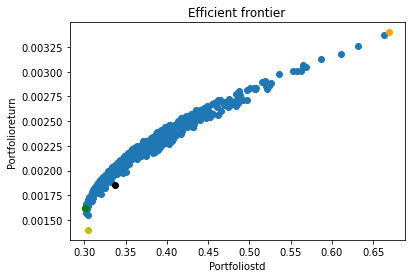

In [ ]:
plt.scatter(stds, returns)
plt.scatter(df.std().iloc[0]*np.sqrt(250),df.mean().iloc[0],c='k') 
plt.scatter(df.std().iloc[1]*np.sqrt(250),df.mean().iloc[1],c='y')
plt.scatter(df.std().iloc[2]*np.sqrt(250),df.mean().iloc[2],c='orange')
plt.scatter(min(stds),returns[stds.index(min(stds))], c='green') #minimum variance portfolio
plt.title("Efficient frontier")
plt.xlabel("Portfoliostd")
plt.ylabel("Portfolioreturn")

In [ ]:
returns[stds.index(min(stds))] #Return on portfolio given minimum variance


0.0016200909838797494

In [ ]:
w[stds.index(min(stds))] #Optimal portfolio weights in minimum variance portfolio. This makes intuitively sense, hence tesla has the lowest portfolio weight which can be explained by its very high volatility

array([0.37346454, 0.60113053, 0.02540493])